# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import seaborn as sns
sns.set()

os.chdir('/Users/abreualberto91/IRONHACK/Datasets')

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

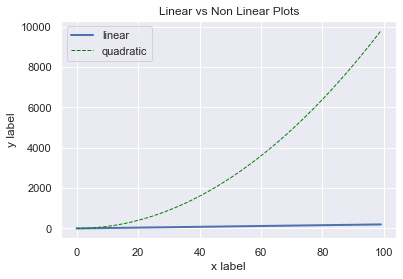

In [6]:
# Method 1
plt.plot(x, y, label='linear', linewidth=2)
plt.plot(x, z, label='quadratic',color='green', linestyle='--', linewidth=1)

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Linear vs Non Linear Plots")
plt.legend()
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

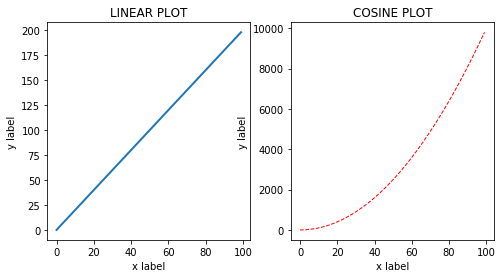

In [34]:
# Method 2
fig, [ax1, ax2] = plt.subplots(1,2, figsize = [8, 4])

ax1.plot(x, y, label='linear', linewidth=2)
ax1.set_title('LINEAR PLOT')   
ax1.set_xlabel('x label')     
ax1.set_ylabel('y label')


ax2.plot(x,z, label='quadratic',color='red', linestyle='--', linewidth=1)
ax2.set_title('COSINE PLOT')
ax2.set_xlabel('x label')
ax2.set_ylabel('y label')

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

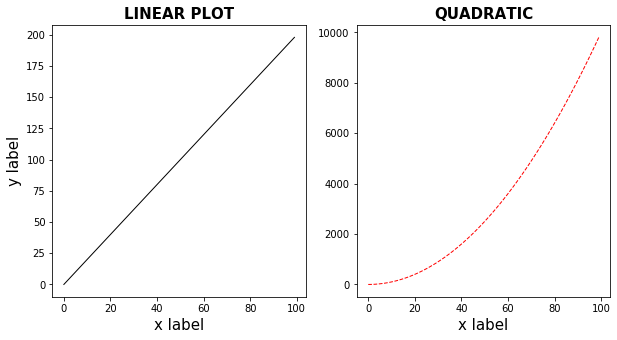

In [67]:
# your code here

fig, [ax1, ax2] = plt.subplots(1,2, figsize = [10,5])

ax1.plot(x, y, label='linear', color='black', linewidth=1)
ax1.set_title('LINEAR PLOT', fontweight = 900, fontsize = 15)   
ax1.set_xlabel('x label', fontsize = 15)     
ax1.set_ylabel('y label', fontsize = 15)


ax2.plot(x,z, label='quadratic',color='red', linestyle='--', linewidth=1)
ax2.set_title('QUADRATIC',fontweight = 900, fontsize = 15)
ax2.set_xlabel('x label',fontsize = 15)


plt.show()


#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

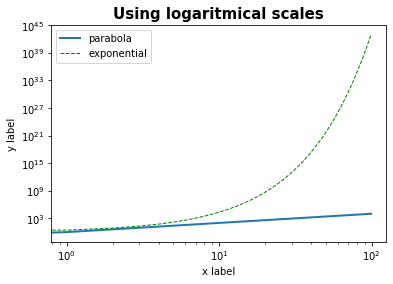

In [90]:
# your code here
import math

y = x**2
z = [math.exp(i) for i in x]

plt.plot(x, y, label='parabola', linewidth=2)
plt.plot(x, z, label='exponential',color='green', linestyle='--', linewidth=1)
plt.xlabel('x label')
plt.ylabel('y label')
plt.xscale('log')
plt.yscale('log')

plt.title('Using logaritmical scales', fontweight = 900, fontsize = 15) 
plt.legend()
plt.show()


#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [93]:
# your code here

fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [109]:
median_steps_month = pd.pivot_table(fitbit, values = 'Steps', index = ['Months_encoded'], \
               aggfunc={'Steps': np.median}).rename(columns = {'Steps': 'median_steps'}).reset_index()

median_steps_month.head(2)

,Months_encoded,median_steps
0,1,10366.0
1,2,9235.0


In [108]:
median_steps_week_end = pd.pivot_table(fitbit, values = 'Steps', index = ['Work_or_Weekend'], \
               aggfunc={'Steps': np.median}).rename(columns = {'Steps': 'median_steps'}).reset_index()

median_steps_week_end

,Work_or_Weekend,median_steps
0,0,9998.0
1,1,10445.5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

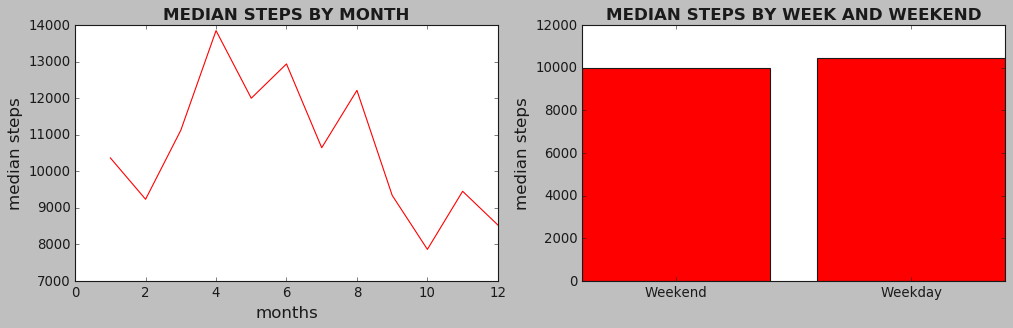

In [444]:
x_months=median_steps_month['Months_encoded']
y_steps_months=median_steps_month['median_steps']

x_week_end=median_steps_week_end['Work_or_Weekend']
y_steps_week_end=median_steps_week_end['median_steps']

fig, [ax1, ax2] = plt.subplots(1,2, figsize = [15,4])

# MEDIAN STEPS BY MONTH_ENCODED
# your code here

ax1.plot(x_months,y_steps_months, color='red')
ax1.set_title('MEDIAN STEPS BY MONTH', fontweight = 900, fontsize = 15)   
ax1.set_xlabel('months', fontsize = 15)     
ax1.set_ylabel('median steps', fontsize = 15)


# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
labels = ['Weekend', 'Weekday']

ax2.bar(x_week_end, y_steps_week_end, tick_label = labels, color='red')
ax2.set_title('MEDIAN STEPS BY WEEK AND WEEKEND', fontweight = 900, fontsize = 15)       
ax2.set_ylabel('median steps', fontsize = 15)


plt.show()



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

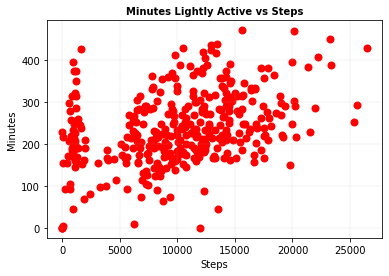

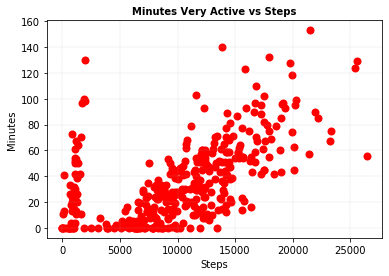

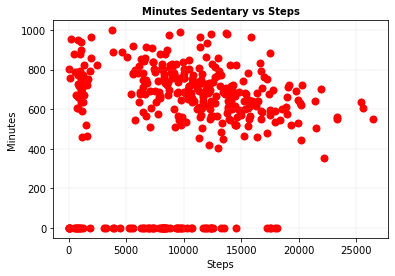

In [165]:
# your code here

labels_y = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']


for i in labels_y:
        plt.scatter(fitbit['Steps'], fitbit[labels_y][i], linewidth=2, color='red')
        plt.title(f"{i} vs Steps", fontweight = 900, fontsize = 10)
        plt.grid(linestyle='--', linewidth=0.2)
        plt.xlabel('Steps')
        plt.ylabel('Minutes')
        plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [168]:
# your code here

titanic = pd.read_csv('titanic.csv').drop('Unnamed: 0', axis =1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [176]:
# your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Gender         1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [455]:
# NUMERICAL VARIABLES
# your code here

numerical = titanic.select_dtypes(include= ['float', 'int64'])
numerical.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [175]:
# CATEGORICAL VARIABLES
# your code here

categorical = titanic.select_dtypes(include= 'object')
categorical.head()


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [346]:
# your code here
from matplotlib.pyplot import style

style.use('classic')



#### Use the right visulalization to show the distribution of column `Age`.

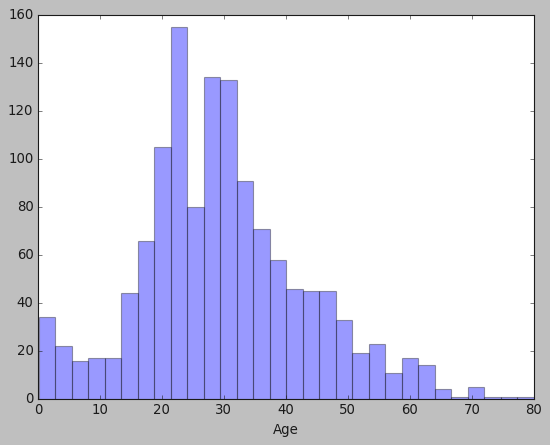

In [201]:
# your code here

age = numerical['Age']
sns.distplot(age, kde=False, color = 'blue')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

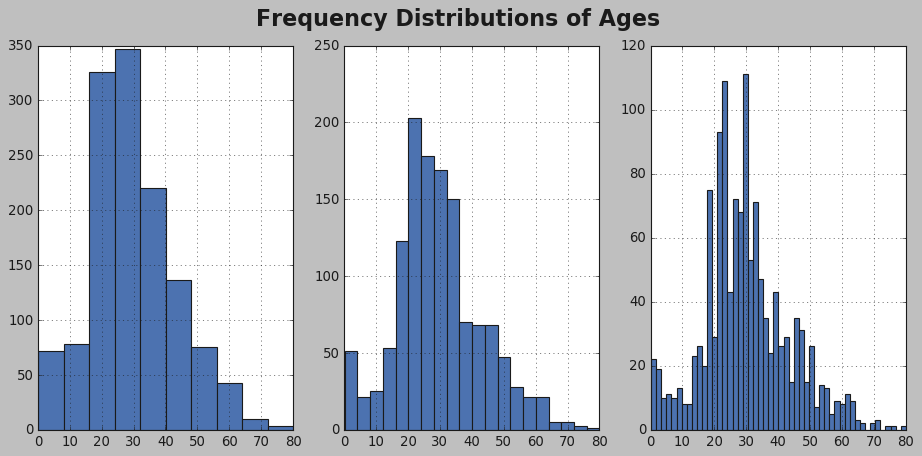

In [230]:
# your code here

fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=[14,6])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Frequency Distributions of Ages', fontweight = 900, fontsize = 20)

ax1.hist(age, bins=10)
ax1.grid()
ax2.hist(age, bins=20)
ax2.grid()
ax3.hist(age, bins=50)
ax3.grid()


plt.show()


#### How does the bin size affect your plot?

In [ ]:
"""
your comments here

The smaller the bins are, the more detail is the graph. In this case it make sense to have a medium bin like
in the middle chart. In thsi way you can avoid seen empty spaces between the bars. 
"""

#### Use seaborn to show the distribution of column `Age`.

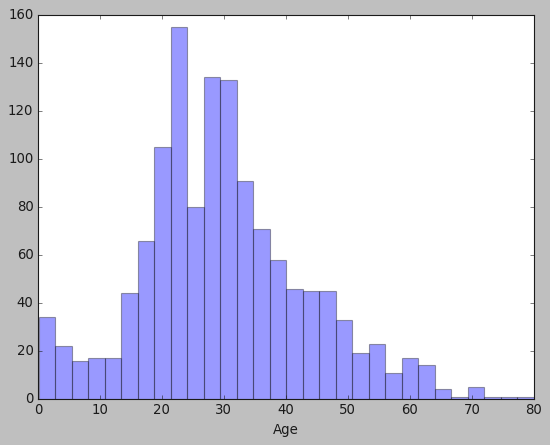

In [231]:
# your code here
sns.distplot(age, kde=False, color = 'blue')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [249]:
genders_df = titanic.groupby('Gender').count()[['PassengerId']].rename(columns = {'PassengerId': 'count'}).\
                                        reset_index()
genders_df

,Gender,count
0,female,466
1,male,843


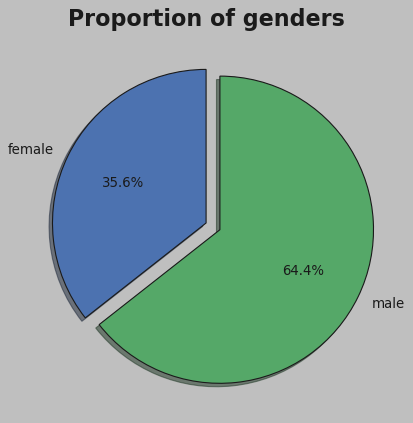

In [261]:
# Method 1 - matplotlib
labels = genders_df['Gender']
female = genders_df['count'][0]
men = genders_df['count'][1]
sizes = [female,men]

plt.pie(sizes, explode = (0,0.1), labels=labels,autopct='%1.1f%%', shadow = 2, startangle=90)
plt.title('Proportion of Genders', fontweight = 900, fontsize = 20)

plt.show()



In [327]:
# Method 2 - seaborn
# your code here

from matplotlib import style
style.available


['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

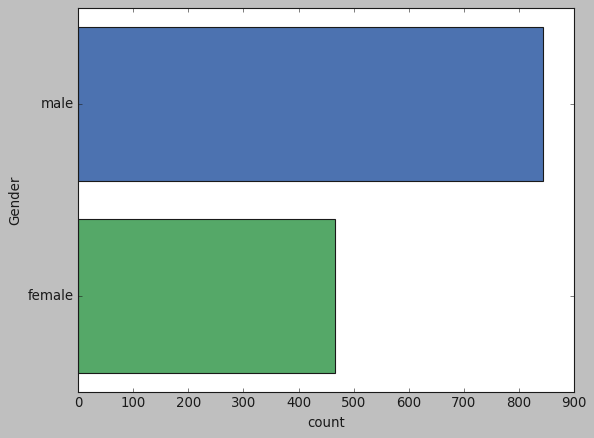

In [361]:
sns.countplot(y="Gender", data=titanic, saturation=5)

#### Use the right plot to visualize the column `Pclass`.

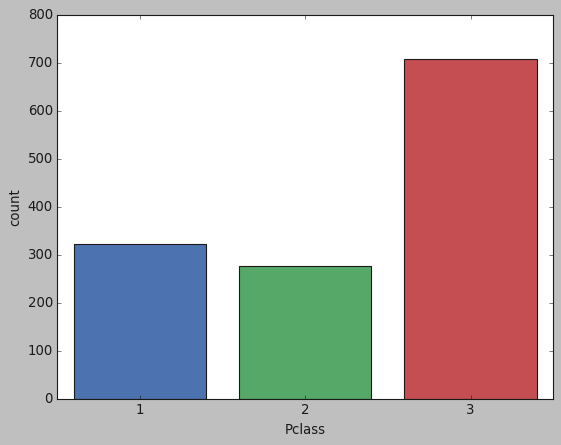

In [365]:
# your code here
sns.countplot(x="Pclass", data=titanic, saturation=5)


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [367]:
titanic['Age'].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

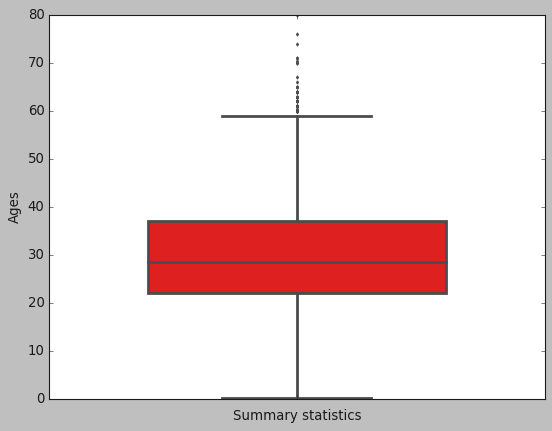

In [397]:
# your code here
ax = sns.boxplot(y=titanic["Age"],linewidth=2.5,fliersize=2, color='red',width=0.6)
ax.set(ylabel='Ages', xlabel='Summary statistics')
plt.show()

In [ ]:
"""
your comments here

The distribution of ages in the Titanic seems to be normal, as there are some indicators like the mean and median.
This boths have values close to 30. Also, 50% of the ages are in the range of 22 and 37 which tells us that the
population was mostly medium age adults. Also, there are some outliers, from 75 to 80 and no newborns.


"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

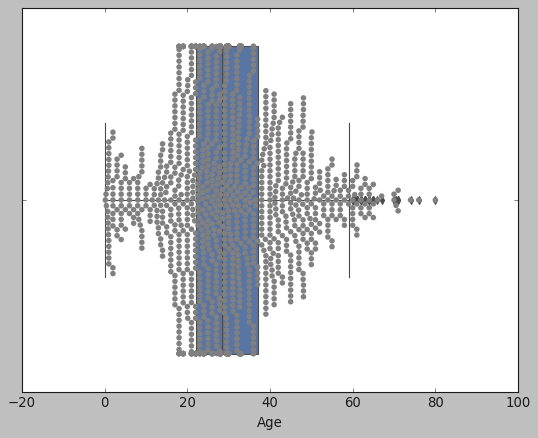

In [479]:
# your code here
sns.boxplot(titanic['Age'])
sns.swarmplot(titanic['Age'], color="grey")
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

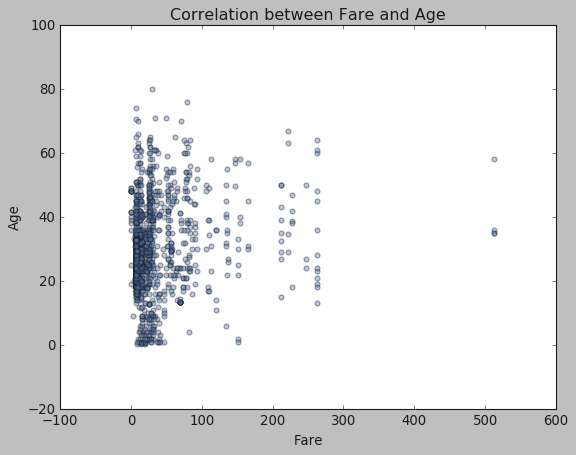

In [447]:
# Method 1 - matplotlib
# your code here

plt.scatter(titanic.Fare, titanic.Age, alpha=0.4)
plt.title("Correlation between Fare and Age")
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()



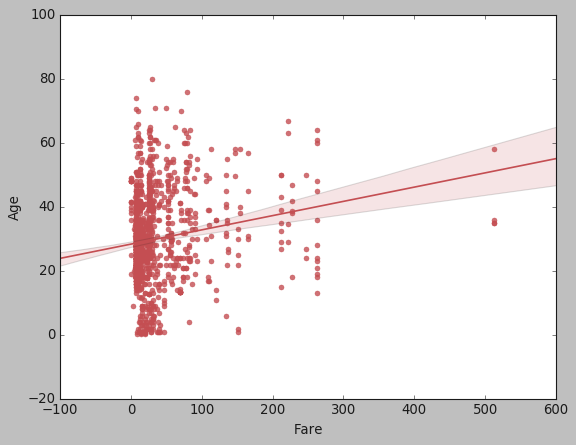

In [434]:
# Method 2 - seaborn
# your code here

sns.regplot('Fare', "Age", data=titanic, fit_reg=True, color='r')

#### Plot the correlation matrix using seaborn.

In [456]:
numerical = numerical.drop(['PassengerId', 'Survived'] ,axis=1)

In [473]:
df = numerical.copy()

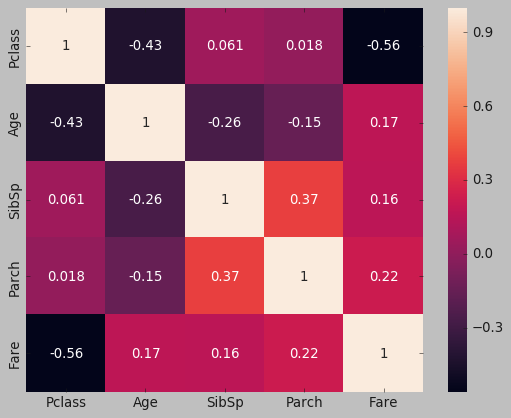

In [477]:
sns.heatmap(numerical.corr(min_periods=12), annot=True)
plt.show()

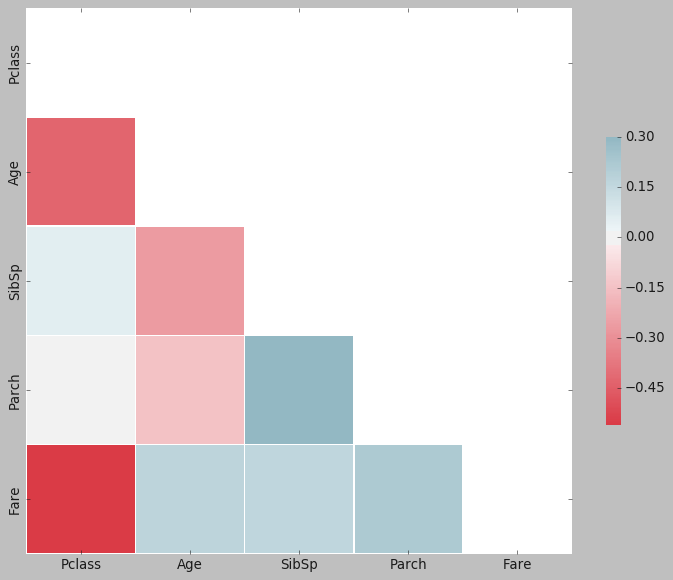

In [475]:
# your code here
# Compute the correlation matrix

corr = numerical.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### What are the most correlated features?

In [ ]:
"""
your comments here

The more correlated features are Parch and SibSp with a correlation coefficient of 0.37.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

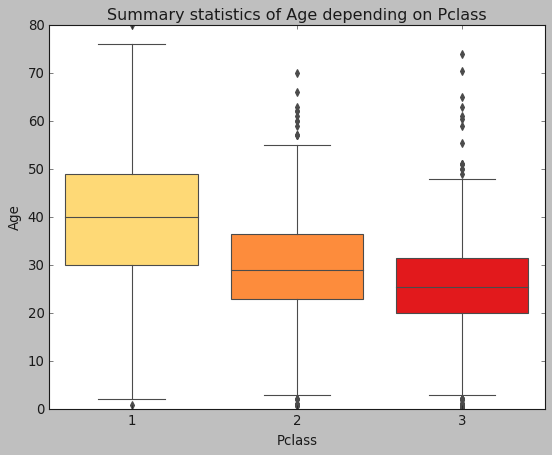

In [490]:
# your code here
ax = sns.boxplot(x="Pclass", y="Age",data=titanic, palette="YlOrRd",saturation=5)
ax.set(title='Summary statistics of Age depending on Pclass')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

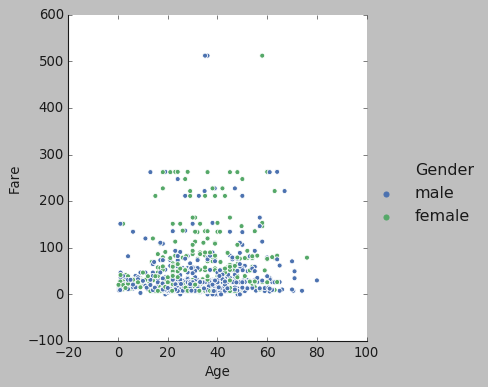

In [496]:
# your code here
sns.relplot(x="Age", y="Fare", hue="Gender", data=titanic)
plt.show()
